<a href="https://colab.research.google.com/github/davis689/binder/blob/master/CHEM225/Chemistry_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Obtaining and displaying data
In this exercise we will look at some chemistry applications of python and ways to obtain and plot data.

First we import some packages that help us with the task of importing data from websites.

In [13]:
import lxml.html as lh
import requests
import pandas as pd

webbook.nist.gov is a huge collection of chemistry data. Let's find some on CO$_2$. [Look at this set](https://webbook.nist.gov/cgi/fluid.cgi?Action=Load&ID=C124389&Type=IsoBar&Digits=5&P=4&THigh=500&TLow=200&TInc=10&RefState=DEF&TUnit=K&PUnit=bar&DUnit=mol%2Fl&HUnit=kJ%2Fmol&WUnit=m%2Fs&VisUnit=uPa*s&STUnit=N%2Fm) of thermodynamic data. Let's import it so that we can manipulate it.

In [14]:
url='https://webbook.nist.gov/cgi/fluid.cgi?Action=Load&ID=C124389&Type=IsoBar&Digits=5&P=4&THigh=500&TLow=250&TInc=10&RefState=DEF&TUnit=K&PUnit=bar&DUnit=mol%2Fl&HUnit=kJ%2Fmol&WUnit=m%2Fs&VisUnit=uPa*s&STUnit=N%2Fm' #look at a wikipedia page
page = requests.get(url).content                           #get the content from the page
df_list = pd.read_html(page)                               #import all the data 
CO2=df_list[0]                                             #name the first data table (table 0) as CO2. This page only has one data table but if it didn't we could change the 0 to another number to extract that table.

If we type CO2 we can verify that the table has been imported. Now our data is held in a 'dataframe' that is somewhat different from the lists we used last time but similar.

In [ ]:
CO2

Now this is a lot of data and we might want to focus our attention on just some of it. Let's say we only care about temperature, density, and Cv (heat capacity). Let's reassign CO2.

In [ ]:
smallCO2=CO2[['Temperature (K)','Density (mol/l)', 'Cv (J/mol*K)']]
smallCO2

We can access the third row of the dataframe using the iloc command like this. Note how it keeps track of the column headers for us so that all the data labeled properly.

In [ ]:
CO2.iloc[2]

Or we can get the third item from the third row (the density at 270 K) like this.

In [ ]:
CO2.iloc[2,2]

In [ ]:
CO2.plot(x='Temperature (K)', y='Density (mol/l)')

**Use the [link](https://webbook.nist.gov/cgi/fluid.cgi?Action=Load&ID=C7732185&Type=IsoBar&Digits=5&P=1&THigh=500&TLow=300&TInc=20&RefState=DEF&TUnit=K&PUnit=bar&DUnit=mol%2Fl&HUnit=kJ%2Fmol&WUnit=m%2Fs&VisUnit=uPa*s&STUnit=N%2Fm) for water to plot how heat capacity $C_V$ varies with temperature**


Many other things can be done using these techniques but let's move on to other things.
Normally we can import the packages that we want to use but sometimes those packages are not used as frequently and need to be installed first. This is true of the mendeleev package.

#Data about atoms

In [42]:
import matplotlib.pyplot as plt

In [ ]:
!pip install mendeleev # colab doesn't have this package so we'll have to install it before we can import it.

Let's import a few atoms from this package. You can choose whichever ones you want.


In [44]:
from mendeleev import element

Now we can get information atoms.

In [ ]:
n=element('N') # get information about nitrogen and store it in variable n.
n # display the information 

That's a lot of information. The names of the properties are before the = sign in the above list. We can use those keynames to get individual parts of that using something like 

```
n.name
n.atomic_weight
n.boiling_point
n.vdw_radius
```

**Try it**

We don't need to import all of the properties and store them in a variable to access the information. We can get any of it using something like


```
element('W').melting_point
```



In [4]:
element('W').melting_point


3680.0

**Get the melting point of silver using a similar line of code.**

In [5]:
Cl=element('Cl')
print(Cl.ionenergies)

{1: 12.96763, 2: 23.81364, 3: 39.8, 4: 53.24, 5: 67.68, 6: 96.94, 7: 114.2013, 8: 348.306, 9: 400.851, 10: 456.68, 11: 529.97, 12: 591.58, 13: 656.3, 14: 750.2, 15: 809.198, 16: 3658.34362, 17: 3946.2908}


In [ ]:
Cl.ionenergies[5]

Let try plotting several atoms (the halogens) against several of their properties.

In [88]:
elem=['F','Cl','Br','I']
radius=[element(x).atomic_radius for x in elem]
ie=[element(x).ionenergies[1] for x in elem]
an=[element(x).atomic_number for x in elem]
en=[element(x).en_pauling for x in elem]

In [83]:
import math

In [ ]:
plt.scatter(an,en,s=[r for r in radius],c=[e for e in ie])#s= size
plt.ylabel ('Electronegativity')
plt.xlabel ('Atomic Number')
plt.title('The Electronegativity of Halogens with their Atomic Number')
plt.colorbar()
plt.show()

In [144]:
elem=['O','S','Se','Te','Po']
an=[element(x).atomic_number for x in elem] # get atomic number for each element in elem
bp=[element(x).boiling_point for x in elem] # get boiling point for each element in elem

In [ ]:
plt.scatter(an,bp)
plt.ylabel ('boiling point (K)')
plt.xlabel ('Atomic Number')
plt.title('The Electronegativity of Halogens with their Atomic Number')
plt.colorbar()
plt.show()

We can also get the whole table.

In [31]:
from mendeleev.fetch import fetch_table
ptable=fetch_table('elements')

Use .info() to get the whole list of properties we can pull out.

In [ ]:
ptable.info()

Let's plot atomic radius vs atomic number. 

Now extract the atomic radius into a variable. Then plot like we did last time. Label with 'atomic radius (pm)' and 'atomic number'. (Note you can just plot the radius without an x data set since it will default to x=1,2,3, etc. just like atomic number but you can also make a nice list like we did last time of [1,2,3,...118] if you want.)

In [ ]:
an=ptable['atomic_number']
ar=ptable['atomic_radius']
plt.plot(an,ar,marker='.')
plt.xlabel('Atomic Number')
plt.ylabel('Atomic Radius (pm)')
plt.show()

If we want to compare across a period, say the second, we can put limits on our plot.


In [ ]:
anl=3 #low atomic number
anh=10 # high atomic number
plt.plot(an[anl-1:anh],ar[anl-1:anh],marker='.') #-1 because an[0] is 1, an[1] is 2 and ar[1] is He radius etc. ar[anl:anh] will give radius up to but not including atomic number anh-1.
plt.xlabel('Atomic Number')
plt.ylabel('Atomic Radius (pm)')
plt.show()

Neon has a surprisingly large radius for being in the same period with the other atoms. This is likely due to a change in method of measurement. The other atoms are likely measured by taking half the length of the covalent bond. Since Ne doesn't form covalent bonds, another method must be taken. The value shown for Ne is likely the van der Waals radius.

This problem may not exist for Ar because it does from at least some bonds with fluorine.

**Try it**

Make a plot of the electronegatively (en_pauling) vs atomic number

#Data about molecules
Now make up a formula and calculate its mass. Let's try CO$_2$. Note how we can make it $^{13}$CO$_2$ if we want.

Let's try some molar mass calculations. Install and import relevant package.


In [35]:
!pip install molmass
from molmass import Formula

In [ ]:
f1=Formula('CO2')
print(f1.mass)

In [ ]:
f2=Formula('[13C]O2')
print(f2.mass)

In [ ]:
!pip install chemicals

In [ ]:
from chemicals import CAS_from_any, MW, Tb, Tm,  Hfl, Hfg, search_chemical
# Search for CASRN by a common name or a unique identifier such as the IchI key
water = CAS_from_any('Water') # get the identifier for water to be used 

MW(water)   # Molecular weight [g/mol]


In [ ]:
Tb(water)   # Normal boiling point [K]


In [ ]:
Tm(water)

In [ ]:
Hfl(CAS_water)  #  heat of formation of liquid [J/mol]


In [ ]:
CAS_from_any('N2O4') # get the CAS identifier for molecules

In [ ]:
MW(CAS_from_any('1,3-dichlorobutane'))

In [ ]:
Tm(CAS_from_any('ammonia'))

In [163]:
search_chemical('ethanoate')

<ChemicalMetadata, name=Acetic acid, ion(1-) (8CI,9CI), formula=C2H3O2-, smiles=CC(=O)[O-], MW=59.044>

#Chemical Equilibrium 
Let's solve an equilibrium system to find all the concentrations if we start with HCO$_3^-$=0.01 M. 

HCO$_3^-$ + H$_2$O <-> H$_3$O$^+$ + CO$_3^{-2}$

H$_2$CO$_3$ + H$_2$O <-> H$_3$O$^+$ + HCO$_3^-$

2H$_2$O <-> H$_3$O$^+$ + OH$^-$

In [ ]:
!pip install chempy

In [151]:
from collections import defaultdict
from chempy.equilibria import EqSystem
from math import log10
import numpy as np
from chempy import Equilibrium
from chempy.chemistry import Species

In [152]:
hco3_diss=Equilibrium({'HCO3-','H2O'},{'CO3-2','H3O+'},10**-10.3) # first reaction {reactants},{products},K_a
carbacid_diss=Equilibrium({'H2CO3','H2O'},{'HCO3-','H3O+'}, 10**-6.3) #second reaction
water_ionization=Equilibrium({'H2O':2}, {'H3O+','OH-'}, 10**-14) #the autoionization reaction and the K. The :2 after H2O indicates the stoichiometry.

molecules='H2O H3O+ OH- H2CO3 HCO3- CO3-2'
substances=[Species.from_formula(f) for f in molecules.split()]
eqsys=EqSystem([water_ionization,carbacid_diss,hco3_diss],substances) # set up the system. 3 rxns and the list of substances


In [162]:
init_conc = defaultdict(float, {'H2O': 1, 'H2CO3':.05,'H3O+':1e-08}) #initial concentrations 

x, sol, sane = eqsys.root(init_conc) #actually solve the system
assert sol['success'] and sane
print(molecules.split())
print(', '.join('%.2g' % v for v in x)) #print the results in the same order we listed them above in the substances line

['H2O', 'H3O+', 'OH-', 'H2CO3', 'HCO3-', 'CO3-2']
1, 0.00016, 6.3e-11, 0.05, 0.00016, 5e-11


.


In [154]:
def solve_eq(ph,carbacid):
  hplus=10**-ph
  init_conc = defaultdict(float, {'H2O': 1, 'H2CO3':carbacid,'H3O+':hplus}) #initial concentrations 
  x, sol, sane = eqsys.root(init_conc) #actually solve the system
  assert sol['success'] and sane
  return x

In [155]:
pH=[i for i in np.arange(0.5,14,.5)]
conc=[solve_eq(pH,.1) for pH in pH]

In [ ]:
solve_eq(13,.1)

array([9.99776403e-01, 2.23596759e-04, 4.47033696e-11, 9.97764033e-02,
       2.23596614e-04, 5.01074845e-11])

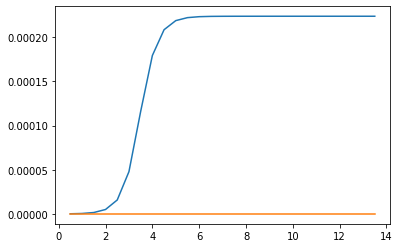

In [161]:
h2co3=[conc[i][3] for i in range(len(conc))]
hco3m=[conc[i][4] for i in range(len(conc))]
co3m2=[conc[i][5] for i in range(len(conc))]
#plt.plot(pH,h2co3)
plt.plot(pH,hco3m)
plt.plot(pH,co3m2)
